<a href="https://colab.research.google.com/github/ValentinTrita/ValentinTrita/blob/main/Tema%20finala%20retea%20neuronala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [21]:
dataset=pd.read_csv('Dataset consum.csv',date_parser=True)

In [22]:
dataset.head()

,Consum,Cilindrii,Putere,Masa,Accelerare,An aparitie,Tara Origine,Producator si model
0,15.70,8,130,3504,12.0,70,1,chevrolet chevelle malibu
1,13.08,8,165,3693,11.5,70,1,buick skylark 320
2,15.70,8,150,3436,11.0,70,1,plymouth satellite
3,13.95,8,150,3433,12.0,70,1,amc rebel sst
4,14.82,8,140,3449,10.5,70,1,ford torino


In [23]:
dataset=dataset[dataset.Putere != "?"]

In [24]:
dataset.shape

(392, 8)

In [25]:
X_train=dataset[["Cilindrii","Putere","Masa","Accelerare","An aparitie","Tara Origine"]]
Y_train=dataset[["Consum"]]

In [26]:
scaler=MinMaxScaler()

In [27]:
X_train=scaler.fit_transform(X_train)

In [28]:
X_train

array([[1.        , 0.45652174, 0.5361497 , 0.23809524, 0.        ,
        0.        ],
       [1.        , 0.64673913, 0.58973632, 0.20833333, 0.        ,
        0.        ],
       [1.        , 0.56521739, 0.51686986, 0.17857143, 0.        ,
        0.        ],
       ...,
       [0.2       , 0.20652174, 0.19336547, 0.21428571, 1.        ,
        0.        ],
       [0.2       , 0.17934783, 0.2869294 , 0.63095238, 1.        ,
        0.        ],
       [0.2       , 0.19565217, 0.31386447, 0.67857143, 1.        ,
        0.        ]])

In [29]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[6]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [30]:
model=build_model()

In [31]:
history=model.fit(X_train,Y_train,epochs=25,
validation_split=0.2, verbose=0)

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

  

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
20,5.135108,1.710458,5.135108,13.044314,2.758693,13.044314,20
21,4.878125,1.676698,4.878125,15.427983,3.016575,15.427983,21
22,4.777363,1.649680,4.777363,13.416096,2.724240,13.416096,22
23,4.521986,1.594449,4.521986,13.186307,2.751707,13.186307,23
24,4.503642,1.581486,4.503642,13.626006,2.715766,13.626006,24


In [33]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [L/100]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()
  

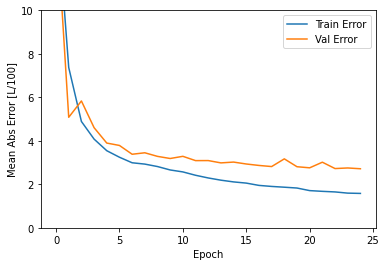

In [34]:
plot_history(history)

In [36]:
d={'Cilindrii': [4],'Putere': [68], 'Masa':[930], 'Accelerare':[18.9], 'An Aparitie':[70], 'Tara Origine':[2]}
df= pd.DataFrame (data=d)
df

,Cilindrii,Putere,Masa,Accelerare,An Aparitie,Tara Origine
0,4,68,930,18.9,70,2


In [37]:
y=model.predict (df*0.001)

1/1 [==============================] - 0s 85ms/step


In [38]:
y

array([[7.713396]], dtype=float32)